
# Zomato Restaurant


# Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

  #  Problem statement : In this dataset predict 2 things –

1) Average Cost for two
2) Price range




# Step 1: importing necessary libraries and load the data

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading dataset
df1= pd.read_csv(r"C:\Users\HP\Documents\Country-Code1.csv")
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


It contains 15 rows and two columns.
1. Country Code: Country in which restaurant is located
2. Country : Name of the country.

In [3]:
df2=pd.read_csv(r"C:\Users\HP\Documents\zomato.csv")
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


It constains 9551 rows and 21 columns. Below are the list of columns present in the given dataset.

1. Restaurant Id: Unique id of every restaurant across various cities of the world
2. Restaurant Name: Name of the restaurant
3. Country Code: Country in which restaurant is located
4. City: City in which restaurant is located
5. Address: Address of the restaurant
6. Locality: Location in the city
7. Locality Verbose: Detailed description of the locality
8. Longitude: Longitude coordinate of the restaurant&#39;s location
9. Latitude: Latitude coordinate of the restaurant&#39;s location
10. Cuisines: Cuisines offered by the restaurant
11. Average Cost for two: Cost for two people in different currencies ��
12. Currency: Currency of the country
13. Has Table booking: yes/no
14. Has Online delivery: yes/ no
15. Is delivering: yes/ no
16. Switch to order menu: yes/no
17. Price range: range of price of food
18. Aggregate Rating: Average rating out of 5
19. Rating color: depending upon the average rating color
20. Rating text: text on the basis of rating of rating
21. Votes: Number of ratings casted by people


In [4]:
#merging the data
df=pd.merge(df2, df1, on = "Country Code", how = "inner")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


# Step 2: Exploratory Data Analysis (EDA)

In [5]:
#list of the columns in the dataset
df.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [6]:
# finding the shape of the dataset
df.shape

(9551, 22)

In [7]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [8]:
df=df.drop('Restaurant ID', axis=1)

In [9]:
df['Locality'].value_counts()

Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Pitampura                                       85
                                              ... 
Lemon Tree Premier, Sector 29                    1
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Moda                                             1
Name: Locality, Length: 1208, dtype: int64

In [10]:
df['Locality Verbose'].value_counts()

Connaught Place, New Delhi                    122
Rajouri Garden, New Delhi                      99
Shahdara, New Delhi                            87
Defence Colony, New Delhi                      86
Pitampura, New Delhi                           85
                                             ... 
Ramada Gurgaon Central, Sector 44, Gurgaon      1
Sector 5, Gurgaon                               1
Sector 53, Gurgaon                              1
The Claremont, MG Road, Gurgaon                 1
Moda, ÛÁstanbul                                 1
Name: Locality Verbose, Length: 1265, dtype: int64

Here we can clearily see that both columns has same values. so i am dropping one column.

In [11]:
df=df.drop('Locality Verbose', axis=1)

In [12]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [13]:
df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [14]:
df=df.drop('Country Code', axis=1)

In [15]:
df.isna().sum()

Restaurant Name         0
City                    0
Address                 0
Locality                0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [16]:
df['Cuisines'].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [17]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

In [18]:
df.isna().sum()

Restaurant Name         0
City                    0
Address                 0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

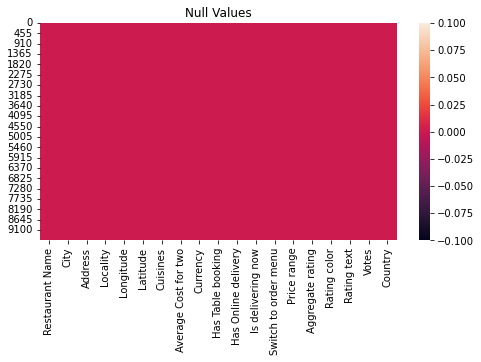

In [19]:
#Visualizing null values
plt.figure(figsize=[8,4])
sns.heatmap(df.isna())
plt.title("Null Values")
plt.show()


In [20]:
#Getting the normal summary and statistical information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   City                  9551 non-null   object 
 2   Address               9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Longitude             9551 non-null   float64
 5   Latitude              9551 non-null   float64
 6   Cuisines              9551 non-null   object 
 7   Average Cost for two  9551 non-null   int64  
 8   Currency              9551 non-null   object 
 9   Has Table booking     9551 non-null   object 
 10  Has Online delivery   9551 non-null   object 
 11  Is delivering now     9551 non-null   object 
 12  Switch to order menu  9551 non-null   object 
 13  Price range           9551 non-null   int64  
 14  Aggregate rating      9551 non-null   float64
 15  Rating color         

It has 3 float64 , 5 int64 and 14 object types data and zero null values.

In [21]:
#checking datatypes
df.dtypes

Restaurant Name          object
City                     object
Address                  object
Locality                 object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [22]:
#checking the unique values
df.nunique()

Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [23]:
#seperating the categorical column and numerical column
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical column: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical column: ", numerical_col)
print("\n")

categorical column:  ['Restaurant Name', 'City', 'Address', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']


numerical column:  ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']




In [24]:
df.describe()

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


As per my observation, the value count is same in all the columns which indicates no missing data.
The difference between the mean and standard devaition of each is not very less.
The mean value is less than std value for Average for two and votes column.
The mean value is more than 50% of median in all columns so, there will skewness problem.
Also we can have min, 75%, max values. there is very huge difference between them in Average for two and votes column.

# Step 3: Visualization

# Univariate Analysis: 

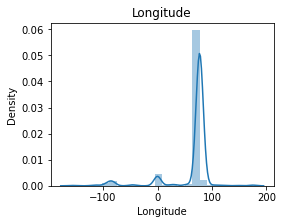

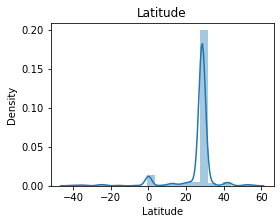

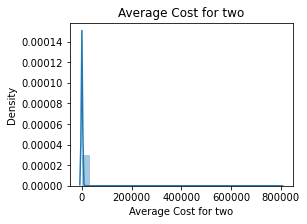

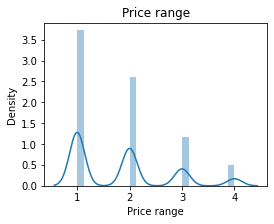

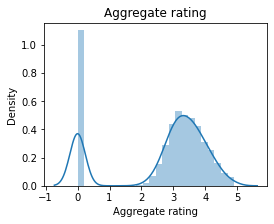

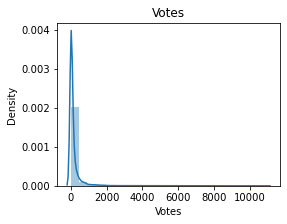

In [26]:
#distribution plot for numerical columns
for k in df[numerical_col]:              
    plt.figure(figsize = (4, 3))
    sns.distplot(df[k], bins = 24)
    plt.title(k)
    plt.show()

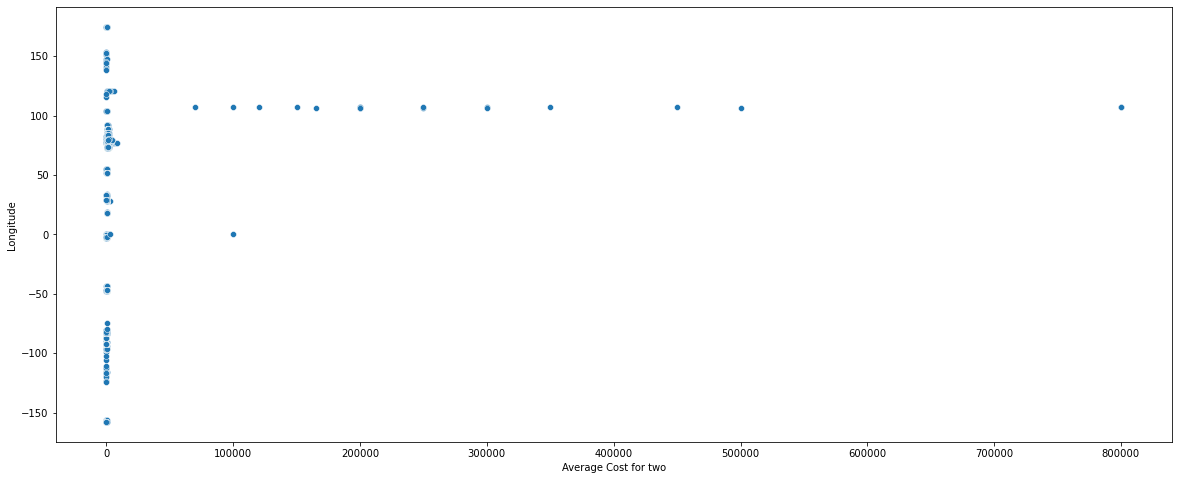

In [28]:
plt.figure(figsize = (20,8))
sns.scatterplot(x='Average Cost for two',y='Longitude',data=df)
plt.show()

There is positive correlation between them.

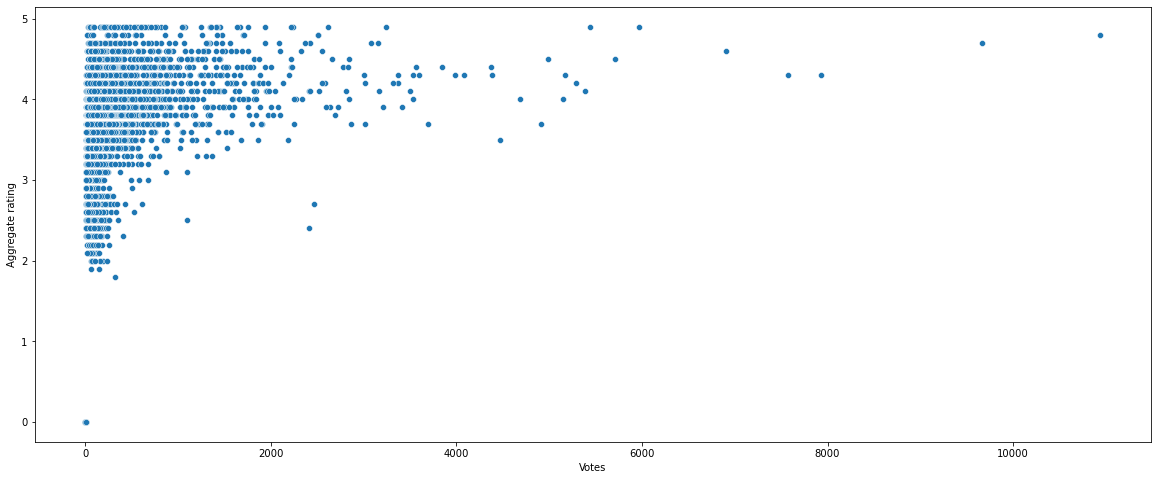

In [30]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Votes',y='Aggregate rating',data=df)
plt.show()


negatively correlated.

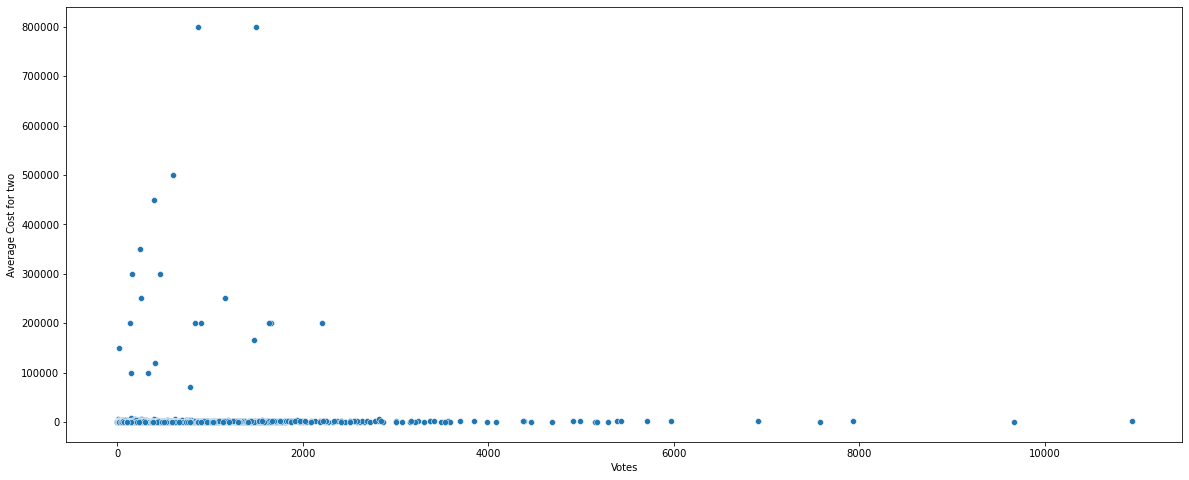

In [31]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Votes',y='Average Cost for two',data=df)
plt.show()

As we can see there negative correlation between them.


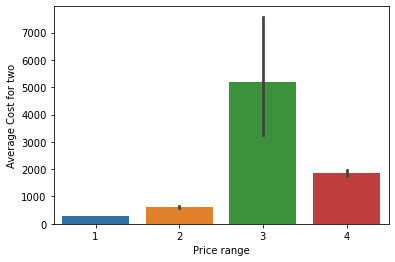

In [33]:
sns.barplot(x='Price range',y='Average Cost for two',data=df)
plt.show()

The average cost for two is high where the price range is 3

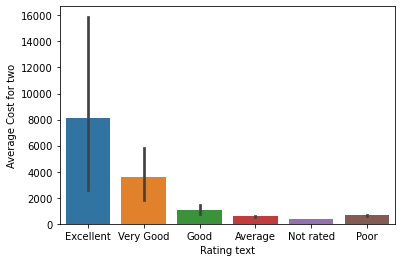

In [35]:
sns.barplot(x='Rating text',y='Average Cost for two',data=df)
plt.show()

The average cost for two is high where the rating text is excellent.

# Preprocessing

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [26]:
df.dtypes

Restaurant Name         int32
City                    int32
Address                 int32
Locality                int32
Longitude               int64
Latitude                int64
Cuisines                int32
Average Cost for two    int64
Currency                int32
Has Table booking       int32
Has Online delivery     int32
Is delivering now       int32
Switch to order menu    int32
Price range             int64
Aggregate rating        int64
Rating color            int32
Rating text             int32
Votes                   int64
Country                 int32
dtype: object

In [27]:
df.head()

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,73,8685,171,8042,384,920,73,0,1,0,0,0,2,31,0,1,314,6
1,3173,73,6055,593,8041,382,1111,75,0,1,0,0,0,2,28,0,1,545,6
2,2897,75,4684,308,8053,388,1671,113,0,1,0,0,0,3,27,1,5,270,6
3,4707,75,8690,862,8050,391,1126,81,0,0,0,0,0,3,32,0,1,362,6
4,5523,75,8689,862,8055,390,1122,81,0,1,0,0,0,3,31,0,1,229,6


In [28]:
#corelation b/n features and target variable.
corr=df.corr()
corr

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant Name,1.000000,-0.001399,0.000763,0.004323,0.007441,0.002191,0.051679,0.039748,0.009669,0.041173,0.028082,0.011984,NaN,0.061275,0.028207,-0.007311,0.012131,0.027975,0.017560
City,-0.001399,1.000000,-0.019763,0.096444,0.235414,0.238175,0.026614,0.014366,-0.071996,-0.003762,0.012723,-0.014039,NaN,-0.105759,-0.160241,0.110887,-0.098985,-0.103381,-0.180959
Address,0.000763,-0.019763,1.000000,0.159555,0.019472,-0.156485,0.023944,0.130976,0.069499,0.006428,0.029874,0.031267,NaN,-0.034952,-0.152976,0.071264,-0.008030,-0.145736,-0.235815
Locality,0.004323,0.096444,0.159555,1.000000,0.033414,-0.048420,0.006993,-0.009156,0.023723,-0.065594,-0.030993,-0.007299,NaN,-0.114460,-0.191394,0.036832,-0.036970,-0.176851,-0.118784
Longitude,0.007441,0.235414,0.019472,0.033414,1.000000,0.025363,0.065876,0.205076,0.063793,0.029874,0.083974,-0.009027,NaN,-0.082466,-0.111688,0.023717,-0.114294,-0.077708,-0.377676
Latitude,0.002191,0.238175,-0.156485,-0.048420,0.025363,1.000000,0.040606,-0.243700,-0.069441,-0.038110,-0.020271,-0.005488,NaN,-0.192919,-0.041361,0.026887,-0.094117,-0.058279,0.247759
Cuisines,0.051679,0.026614,0.023944,0.006993,0.065876,0.040606,1.000000,0.079978,0.068912,0.050639,-0.016639,0.007773,NaN,-0.005350,-0.107246,-0.016228,-0.079979,-0.053531,-0.127955
Average Cost for two,0.039748,0.014366,0.130976,-0.009156,0.205076,-0.243700,0.079978,1.000000,0.158196,0.493727,0.230209,0.030419,NaN,0.562196,0.166273,0.001503,-0.052723,0.196170,-0.479992
Currency,0.009669,-0.071996,0.069499,0.023723,0.063793,-0.069441,0.068912,0.158196,1.000000,0.000640,0.006991,0.001458,NaN,0.075179,-0.005375,-0.040430,0.014598,-0.036669,-0.105296
Has Table booking,0.041173,-0.003762,0.006428,-0.065594,0.029874,-0.038110,0.050639,0.493727,0.000640,1.000000,0.101224,-0.016816,NaN,0.501925,0.196435,-0.021365,0.044043,0.259693,-0.062076


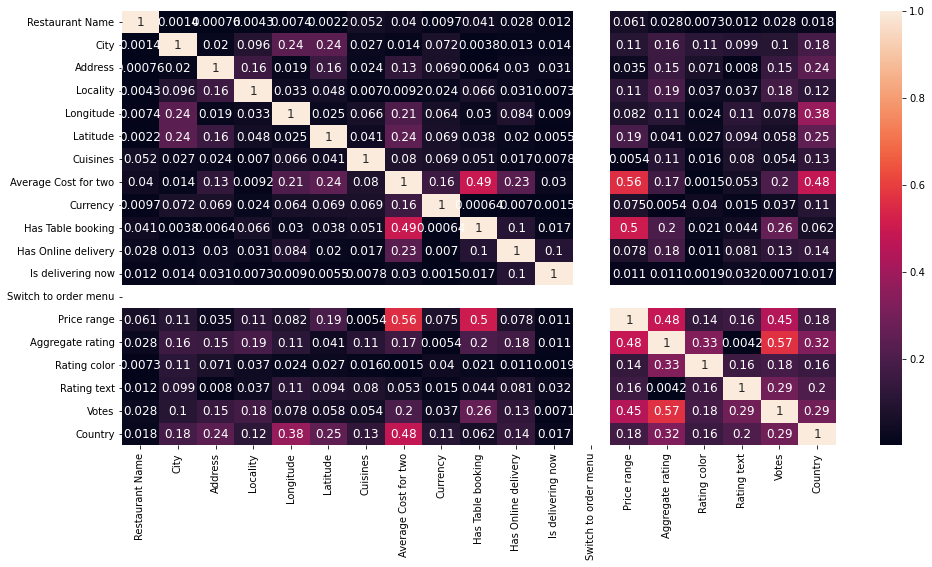

In [29]:
df_corr=df.corr().abs()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

In [30]:
df.corr()['Average Cost for two'].sort_values()

Country                -0.479992
Latitude               -0.243700
Rating text            -0.052723
Locality               -0.009156
Rating color            0.001503
City                    0.014366
Is delivering now       0.030419
Restaurant Name         0.039748
Cuisines                0.079978
Address                 0.130976
Currency                0.158196
Aggregate rating        0.166273
Votes                   0.196170
Longitude               0.205076
Has Online delivery     0.230209
Has Table booking       0.493727
Price range             0.562196
Average Cost for two    1.000000
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

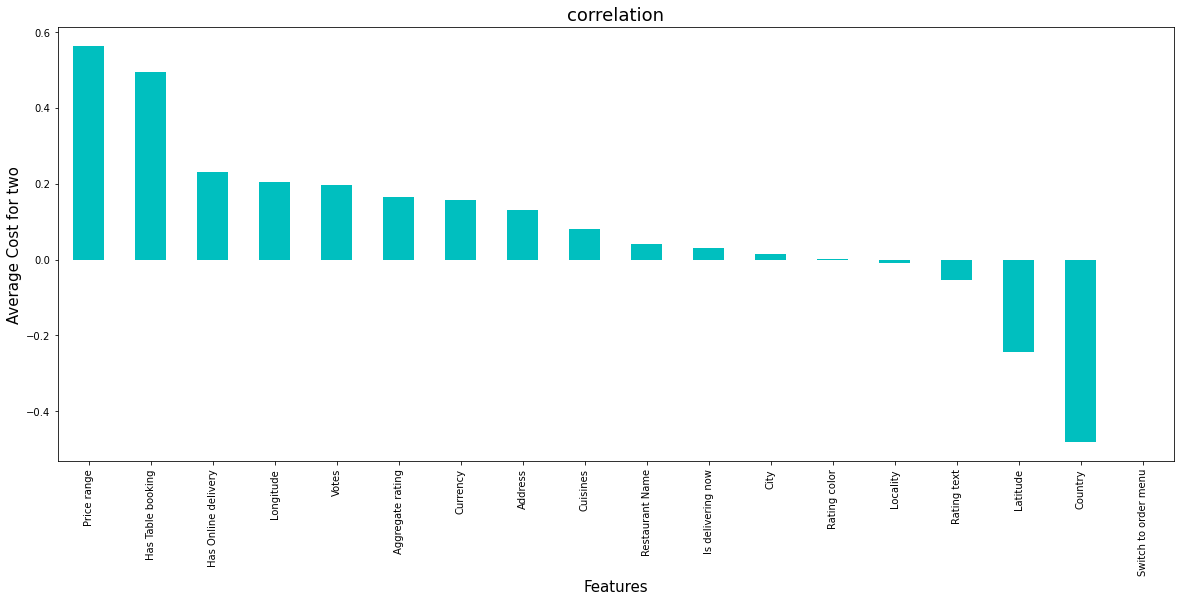

In [31]:
plt.figure(figsize = (20,8))
df.corr()['Average Cost for two'].sort_values(ascending = False).drop(['Average Cost for two']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Average Cost for two',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

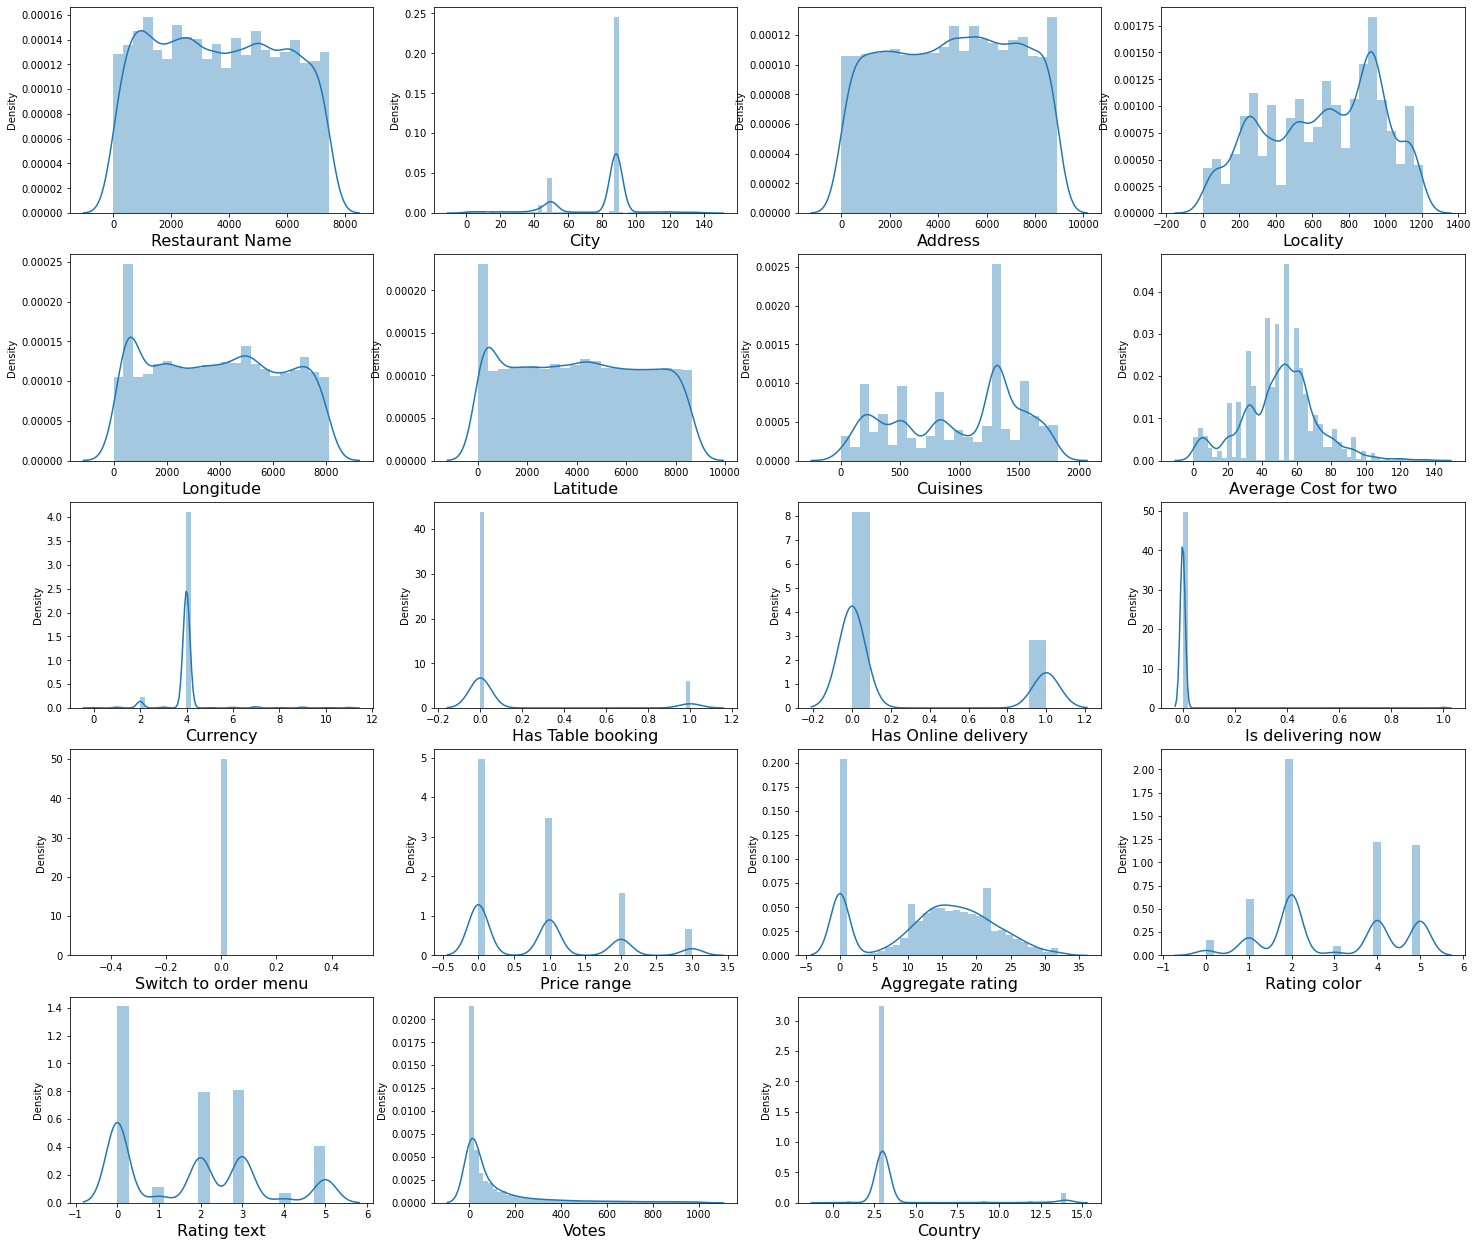

In [32]:
plt.figure(figsize=(25,22),facecolor="white")
plotnumber=1
for columns in df:
    if plotnumber<=22:
    
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns, fontsize=16)
        
    plotnumber+=1
plt.show()

In [33]:
df.skew()

Restaurant Name          0.044637
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Longitude                0.050762
Latitude                 0.043785
Cuisines                -0.307425
Average Cost for two     0.089636
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.296072
Rating color             0.046009
Rating text              0.431408
Votes                    2.445367
Country                  3.312721
dtype: float64

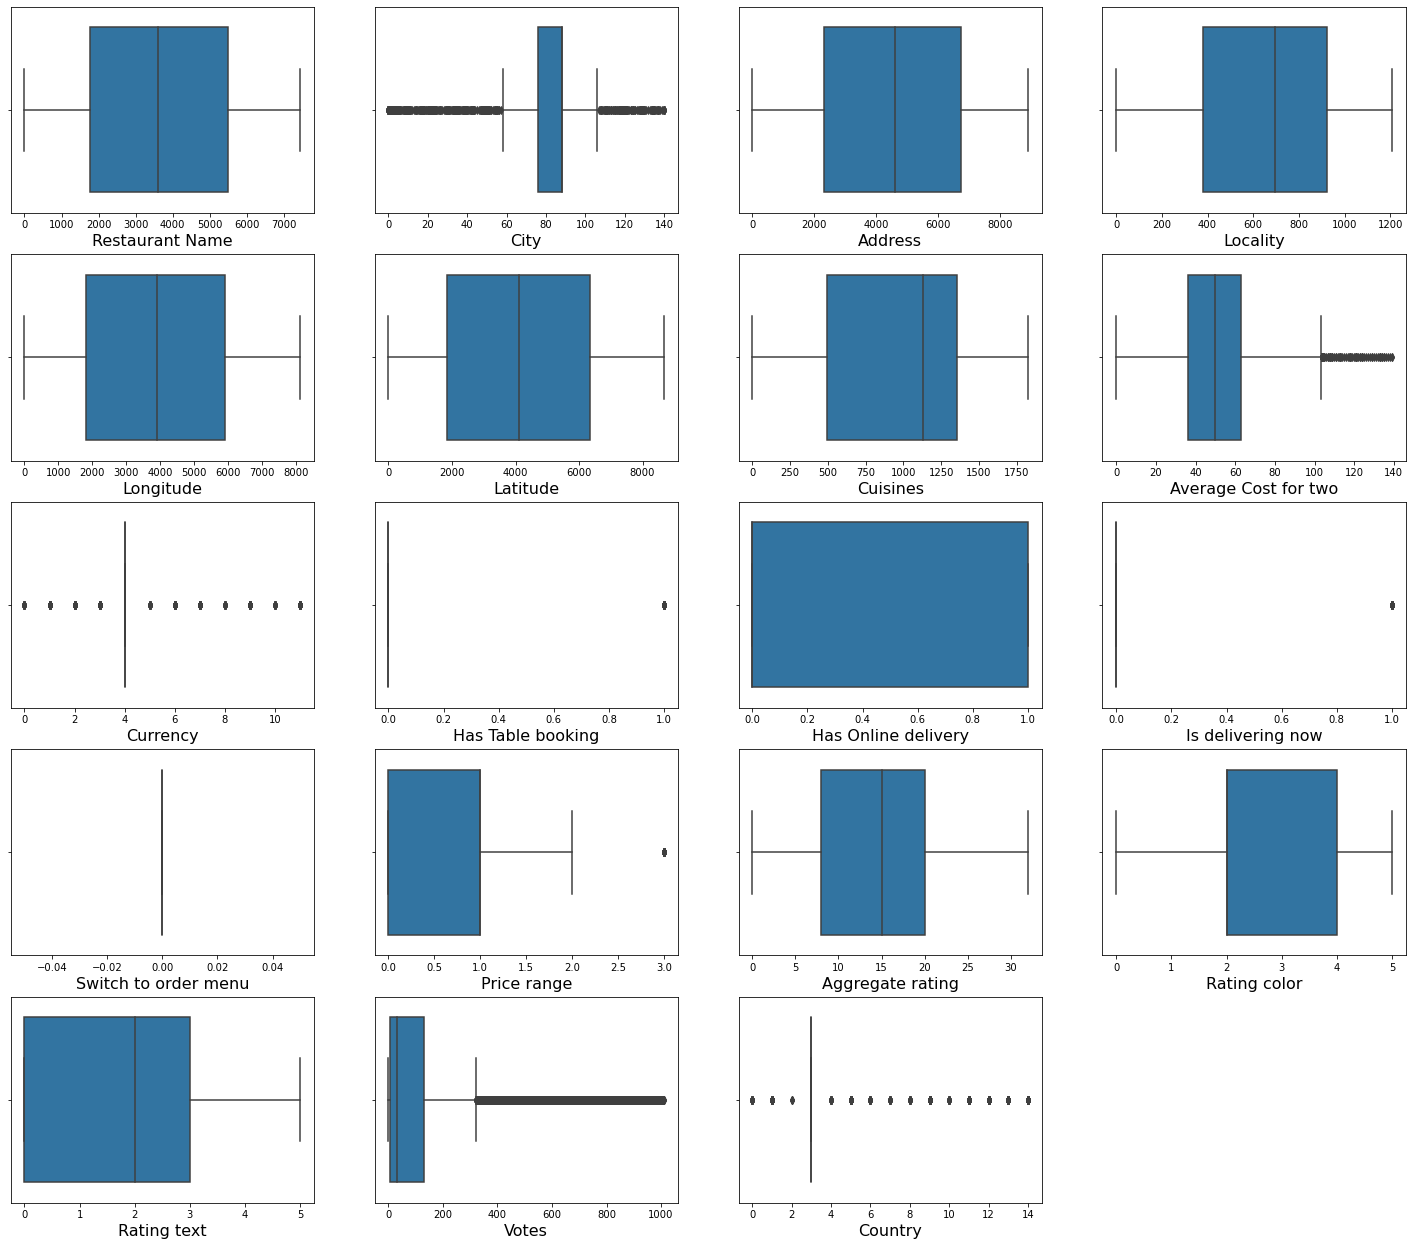

In [34]:
plt.figure(figsize=(25,22),facecolor="white")
plotnumber=1
for columns in df:
    if plotnumber<=22:
    
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df[columns])
        plt.xlabel(columns, fontsize=16)
        
    plotnumber+=1
plt.show()

There are outliers in city, Average cost for two, currency, Has Table booking,votes,price range,is delivaring now, country columns. have to remove those outliers.

In [35]:
# removing the outliers using z_score
from scipy.stats import zscore

z_score = zscore(df[['Average Cost for two','Price range']]) 
abs_z_score = np.abs(z_score)    

p = (abs_z_score  < 3).all(axis=1)

DF = df[p]
DF.shape

(9490, 19)

In [36]:
df.shape

(9551, 19)

In [37]:
data_loss = (9551 - 9490)/9551*100
data_loss

0.6386765783687572

In [38]:
a = DF.drop(columns=['Average Cost for two'],axis=1)
b1= DF['Average Cost for two']

In [39]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.046708,-0.229084,1.621589,-1.541568,1.752035,-1.448147,-0.134749,-4.354594,2.722705,-0.590087,-0.059963,0.0,1.347860,2.013592,-1.985609,-0.462452,0.997355,0.850596
1,-0.222191,-0.229084,0.595676,-0.204460,1.751613,-1.448921,0.236569,-4.354594,2.722705,-0.590087,-0.059963,0.0,1.347860,1.669876,-1.985609,-0.462452,2.165842,0.850596
2,-0.351038,-0.142900,0.060874,-1.107483,1.756684,-1.446600,1.325248,-4.354594,2.722705,-0.590087,-0.059963,0.0,2.464605,1.555304,-1.313637,1.900858,0.774786,0.850596
3,0.493939,-0.142900,1.623540,0.647866,1.755416,-1.445439,0.265730,-4.354594,-0.367282,-0.590087,-0.059963,0.0,2.464605,2.128163,-1.985609,-0.462452,1.240157,0.850596
4,0.874879,-0.142900,1.623150,0.647866,1.757529,-1.445826,0.257953,-4.354594,2.722705,-0.590087,-0.059963,0.0,2.464605,2.013592,-1.985609,-0.462452,0.567392,0.850596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9485,0.370694,2.658105,0.545355,-0.445267,-1.378570,1.660134,1.601306,7.695456,-0.367282,-0.590087,-0.059963,0.0,1.347860,1.211588,-1.313637,1.900858,2.762731,2.730990
9486,-1.091444,2.658105,0.559398,-0.334369,-1.374766,1.659747,1.622691,7.695456,-0.367282,-0.590087,-0.059963,0.0,1.347860,1.326160,-1.313637,1.900858,3.228102,2.730990
9487,-0.270742,2.658105,0.560958,-0.328032,-1.375611,1.662455,0.234625,7.695456,-0.367282,-0.590087,-0.059963,0.0,2.464605,0.753301,1.374249,0.128376,2.368177,2.730990
9488,-1.463981,2.658105,0.561348,-0.328032,-1.375189,1.662842,1.298031,7.695456,-0.367282,-0.590087,-0.059963,0.0,2.464605,1.097017,-1.313637,1.900858,3.020709,2.730990


In [99]:
x_scaled

array([[ 0.04670804, -0.22908436,  1.62158935, ..., -0.46245173,
         0.99735465,  0.85059606],
       [-0.22219086, -0.22908436,  0.59567557, ..., -0.46245173,
         2.16584155,  0.85059606],
       [-0.35103825, -0.1428996 ,  0.06087414, ...,  1.90085839,
         0.77478572,  0.85059606],
       ...,
       [-0.27074205,  2.65810516,  0.56095834, ...,  0.1283758 ,
         2.36817694,  2.73099034],
       [-1.4639809 ,  2.65810516,  0.56134842, ...,  1.90085839,
         3.02070859,  2.73099034],
       [ 1.67644077,  2.65810516, -0.10530049, ...,  1.90085839,
         2.16584155,  2.73099034]])

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.007857,Restaurant Name
1,1.194758,City
2,1.113161,Address
3,1.076252,Locality
4,1.236170,Longitude
5,1.311391,Latitude
6,1.049060,Cuisines
7,1.045076,Currency
8,1.423799,Has Table booking
9,1.119787,Has Online delivery


In [101]:
a=a.drop("Switch to order menu",axis=1)

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.007857,Restaurant Name
1,1.194758,City
2,1.113161,Address
3,1.076252,Locality
4,1.236170,Longitude
5,1.311391,Latitude
6,1.049060,Cuisines
7,1.045076,Currency
8,1.423799,Has Table booking
9,1.119787,Has Online delivery


In [103]:
a.shape

(9490, 17)

In [104]:
a= DF.drop(columns=['Average Cost for two'],axis=1)
b= DF[['Average Cost for two','Price range']]

In [105]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(a,b1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(a.columns)

In [106]:
fit = bestfeat.fit(a,b1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(a.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

                 Feature       Score
12           Price range  465.191933
17               Country  346.542007
8      Has Table booking   82.663879
16                 Votes   34.580002
7               Currency   32.642263
13      Aggregate rating   32.626247
4              Longitude   13.583676
9    Has Online delivery   12.856598
5               Latitude   12.059068
2                Address    8.268591
15           Rating text    7.993204
1                   City    5.200960
14          Rating color    4.620210
6               Cuisines    4.219634
3               Locality    3.622468
10     Is delivering now    2.281914
0        Restaurant Name    1.324177
11  Switch to order menu         NaN


In [107]:
x_best = a.drop(columns=['Restaurant Name','Switch to order menu','Is delivering now']).copy()

In [108]:
df.skew()

Restaurant Name          0.044637
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Longitude                0.050762
Latitude                 0.043785
Cuisines                -0.307425
Average Cost for two     0.089636
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.296072
Rating color             0.046009
Rating text              0.431408
Votes                    2.445367
Country                  3.312721
dtype: float64

In [109]:
from sklearn.preprocessing import power_transform
a= power_transform(x_best,method='yeo-johnson')

In [110]:
trans = pd.DataFrame(a)

In [111]:
trans.skew()

0    -0.203956
1    -0.298709
2    -0.303947
3    -0.281070
4    -0.323470
5    -0.384952
6     0.441849
7     2.355795
8     1.104752
9     0.146300
10   -0.517067
11   -0.102441
12   -0.058528
13   -0.025749
14   -1.339450
dtype: float64

In [113]:
x = scaler.fit_transform(a)
x

array([[-0.3992959 ,  1.48083324, -1.55675423, ..., -0.21942265,
         1.26888702,  1.55396305],
       [-0.3992959 ,  0.62963863, -0.18592532, ..., -0.21942265,
         1.57796526,  1.55396305],
       [-0.30401348,  0.14715967, -1.1003585 , ...,  1.50452081,
         1.18547357,  1.55396305],
       ...,
       [ 3.86025998,  0.59927582, -0.30913055, ...,  0.38161822,
         1.61816756,  2.62268742],
       [ 3.86025998,  0.59961764, -0.30913055, ...,  1.50452081,
         1.7318892 ,  2.62268742],
       [ 3.86025998, -0.01015066,  0.05593359, ...,  1.50452081,
         1.57796526,  2.62268742]])

# Step 5: Modelling

In [118]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [119]:
a= DF.drop(columns=['Average Cost for two'],axis=1)
b1= DF[['Average Cost for two']]

In [120]:
#finding the best random state
Accu_max=0
Rs_max=0
for k in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(a,b1, test_size=0.22, random_state=k)
    Dr=DecisionTreeRegressor()
    Dr.fit(x_train,y_train)
    pred=Dr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The max r2 score is', Accu_max, 'at random state is', Rs_max)

The max r2 score is 0.8419209416496544 at random state is 838


In [121]:
 #forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b1, test_size=0.22, random_state=838)

In [122]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rfr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))



R2_score: 91.31536889364469
R2_score on training data: 98.4924914646857
Mean Absolute Error: 4.675756704980842
Mean Squared Error: 40.66950986590039
Root Mean Squared Error: 6.377265077280415


In [123]:
Dr=DecisionTreeRegressor()
Dr.fit(x_train,y_train)
pred_Dr=Dr.predict(x_test)
pred_train=Dr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_Dr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_Dr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_Dr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_Dr)))


R2_score: 84.32525083543115
R2_score on training data: 100.0
Mean Absolute Error: 5.664272030651341
Mean Squared Error: 73.40373563218391
Root Mean Squared Error: 8.56759800832088


In [124]:
sv=SVR()
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
pred_train=sv.predict(x_train)
print('R2_score:',r2_score(y_test,pred_sv)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_sv))
print('Mean Squared Error:',mean_squared_error(y_test,pred_sv))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_sv)))


R2_score: 30.077486497217233
R2_score on training data: 23.94883975044054
Mean Absolute Error: 13.873771935551094
Mean Squared Error: 327.4421582131426
Root Mean Squared Error: 18.095362892551854


In [125]:
tr=ExtraTreesRegressor()
tr.fit(x_train,y_train)
pred_tr=tr.predict(x_test)
pred_train=tr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_tr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_tr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_tr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_tr)))


R2_score: 90.4725151304521
R2_score on training data: 99.99999989898414
Mean Absolute Error: 4.864176245210728
Mean Squared Error: 44.61653409961686
Root Mean Squared Error: 6.679560921169658


In [126]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))


R2_score: 38.82301067557348
R2_score on training data: 52.95019951056029
Mean Absolute Error: 12.871360153256706
Mean Squared Error: 286.48749042145596
Root Mean Squared Error: 16.925941345209015


In [127]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
pred_train=gb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_gb)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_gb)))


R2_score: 89.66489116274836
R2_score on training data: 89.34903394112249
Mean Absolute Error: 5.363666122396641
Mean Squared Error: 48.39857970641628
Root Mean Squared Error: 6.956908775197234


In [128]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
pred_train=xgb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_xgb)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_xgb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_xgb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_xgb)))


R2_score: 91.16844200474831
R2_score on training data: 96.95009176214107
Mean Absolute Error: 4.755995509432364
Mean Squared Error: 41.3575580379366
Root Mean Squared Error: 6.4309842200037


# Crossvalidation

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
score=cross_val_score(rfr, a,b1)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_rfr)-score.mean() )

[0.42285592 0.86187936 0.83369398 0.85819563 0.03896716]
0.6031184100361696
Difference between R2 score and cross validation score is-  0.31003527890027727


In [131]:
score=cross_val_score(Dr, a,b1)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_Dr)-score.mean() )

[ 0.5776807   0.73133521  0.68890991  0.74703703 -0.06982912]
0.5350267462542766
Difference between R2 score and cross validation score is-  0.30822576210003494


In [132]:
score=cross_val_score(tr, a,b1)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_tr)-score.mean() )


[0.5121565  0.85888812 0.81866346 0.85186708 0.33656463]
0.6756279593177442
Difference between R2 score and cross validation score is-  0.2290971919867767


In [133]:
score=cross_val_score(xgb, a,b1)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_xgb)-score.mean() )

[-0.06713434  0.85117267  0.83551716  0.8571706  -0.00686971]
0.49397127509295463
Difference between R2 score and cross validation score is-  0.41771314495452855


In [134]:
score=cross_val_score(xgb, a,b1)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_xgb)-score.mean() )

[-0.06713434  0.85117267  0.83551716  0.8571706  -0.00686971]
0.49397127509295463
Difference between R2 score and cross validation score is-  0.41771314495452855


After doing crossvalidation extratreesregressor model has less score compare with other models.

# Step6: Hyperparameter Tuning

In [139]:
#import the Grid search CV
grid_param={
    
    'max_depth':range(20,42),
    'min_samples_leaf': range(1,4),
    'min_samples_split':range(2,5),
    'max_leaf_nodes' :range(20,40)
}

In [140]:
grid_search=GridSearchCV(estimator=tr,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(20, 42),
                         'max_leaf_nodes': range(20, 40),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 5)})

In [141]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'max_depth': 37, 'max_leaf_nodes': 39, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [271]:
final_model=ExtraTreesRegressor(max_depth= 1747, max_leaf_nodes=1762, min_samples_leaf= 2, min_samples_split=4)
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)*100

90.7825232476954

In [272]:
pred=final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 90.7825232476954
Mean Absolute Error: 4.839320232547821
Mean Squared Error: 43.16478813270876
Root Mean Squared Error: 6.5699914865019995


# Step6: Save the model

In [273]:
#saving my model
import pickle

filename='Average cost for two (Zomato restaurant) prediction'
pickle.dump(tr, open(filename,'wb'))

In [274]:
import pickle
loaded_model=pickle.load(open('Average cost for two (Zomato restaurant) prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

90.4725151304521


 # Price range prediction

# Step7 Model building

# Extra Trees Classifier Model

In [40]:
df.head()

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,73,8685,171,8042,384,920,73,0,1,0,0,0,2,31,0,1,314,6
1,3173,73,6055,593,8041,382,1111,75,0,1,0,0,0,2,28,0,1,545,6
2,2897,75,4684,308,8053,388,1671,113,0,1,0,0,0,3,27,1,5,270,6
3,4707,75,8690,862,8050,391,1126,81,0,0,0,0,0,3,32,0,1,362,6
4,5523,75,8689,862,8055,390,1122,81,0,1,0,0,0,3,31,0,1,229,6


In [41]:
a2 = DF.drop(columns=['Price range'],axis=1)
b2 = DF['Price range']

In [42]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a2)
x_scaled
a2=pd.DataFrame(scaler.fit_transform(a2),columns=a2.columns)
a2

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.046708,-0.229084,1.621589,-1.541568,1.752035,-1.448147,-0.134749,1.099654,-4.354594,2.722705,-0.590087,-0.059963,0.0,2.013592,-1.985609,-0.462452,0.997355,0.850596
1,-0.222191,-0.229084,0.595676,-0.204460,1.751613,-1.448921,0.236569,1.195341,-4.354594,2.722705,-0.590087,-0.059963,0.0,1.669876,-1.985609,-0.462452,2.165842,0.850596
2,-0.351038,-0.142900,0.060874,-1.107483,1.756684,-1.446600,1.325248,3.013410,-4.354594,2.722705,-0.590087,-0.059963,0.0,1.555304,-1.313637,1.900858,0.774786,0.850596
3,0.493939,-0.142900,1.623540,0.647866,1.755416,-1.445439,0.265730,1.482405,-4.354594,-0.367282,-0.590087,-0.059963,0.0,2.128163,-1.985609,-0.462452,1.240157,0.850596
4,0.874879,-0.142900,1.623150,0.647866,1.757529,-1.445826,0.257953,1.482405,-4.354594,2.722705,-0.590087,-0.059963,0.0,2.013592,-1.985609,-0.462452,0.567392,0.850596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9485,0.370694,2.658105,0.545355,-0.445267,-1.378570,1.660134,1.601306,-1.627449,7.695456,-0.367282,-0.590087,-0.059963,0.0,1.211588,-1.313637,1.900858,2.762731,2.730990
9486,-1.091444,2.658105,0.559398,-0.334369,-1.374766,1.659747,1.622691,-1.388230,7.695456,-0.367282,-0.590087,-0.059963,0.0,1.326160,-1.313637,1.900858,3.228102,2.730990
9487,-0.270742,2.658105,0.560958,-0.328032,-1.375611,1.662455,0.234625,-1.005478,7.695456,-0.367282,-0.590087,-0.059963,0.0,0.753301,1.374249,0.128376,2.368177,2.730990
9488,-1.463981,2.658105,0.561348,-0.328032,-1.375189,1.662842,1.298031,-1.292542,7.695456,-0.367282,-0.590087,-0.059963,0.0,1.097017,-1.313637,1.900858,3.020709,2.730990


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a2.values,i) for i in range(len(a2.columns))] 
vif['features']=a2.columns
vif

,VIF values,features
0,1.007050,Restaurant Name
1,1.192637,City
2,1.113591,Address
3,1.075865,Locality
4,1.236153,Longitude
5,1.258751,Latitude
6,1.047398,Cuisines
7,2.246175,Average Cost for two
8,1.054705,Currency
9,1.451680,Has Table booking


In [44]:
a2=a2.drop('Switch to order menu',axis=1)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a2.values,i) for i in range(len(a2.columns))] 
vif['features']=a2.columns
vif

,VIF values,features
0,1.007050,Restaurant Name
1,1.192637,City
2,1.113591,Address
3,1.075865,Locality
4,1.236153,Longitude
5,1.258751,Latitude
6,1.047398,Cuisines
7,2.246175,Average Cost for two
8,1.054705,Currency
9,1.451680,Has Table booking


Now, there is no multicollinearity problem.

In [46]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X = scaler.fit_transform(a2)


In [47]:
b2.value_counts()

0    4444
1    3112
2    1388
3     546
Name: Price range, dtype: int64

In [48]:
#balancing the label values.
from imblearn.over_sampling import SMOTE
sampling= SMOTE()

a2,b2=sampling.fit_resample(a2,b2)

In [49]:
b2.value_counts()

2    4444
3    4444
1    4444
0    4444
Name: Price range, dtype: int64

In [50]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a2)
x_scaled

array([[ 0.01151964, -0.16455499,  1.6499653 , ..., -0.58655677,
         0.5714493 ,  0.61421034],
       [-0.26696498, -0.16455499,  0.60119099, ..., -0.58655677,
         1.54644105,  0.61421034],
       [-0.40040552, -0.0874842 ,  0.05447252, ...,  1.64263824,
         0.38573659,  0.61421034],
       ...,
       [ 0.64810405,  1.45554885,  1.07479783, ...,  1.64263824,
        -0.61773753, -1.00835617],
       [ 0.63644436, -0.12601959,  1.6484411 , ...,  1.64263824,
        -0.42955395,  2.88580345],
       [ 1.62282641,  0.41347593, -0.86502248, ..., -1.14385552,
        -0.49308958, -0.35932957]])

In [51]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [52]:
#getting best random state

Accu_max=0
Rs_max=0
for k in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(a2,b2, test_size=0.22, random_state=k)
    
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The best accuracy is', Accu_max, 'at random state is', Rs_max)

The best accuracy is 0.9941191511122475 at random state is 150


In [53]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a2,b2, test_size=0.22, random_state=150)

In [54]:
def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    if train==False:
        pred=clf.predict(x_test)
        
        print("\n================ Test Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Reprt \n', classification_report(y_test,pred, digits=2))
        

In [55]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
metric_score(dc,x_train,x_test,y_train,y_test, train=True)
metric_score(dc,x_train,x_test,y_train,y_test, train=False)
y_pred=dc.predict(x_test)
probs_dc=dc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 97.673229%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       961
           1       0.98      0.98      0.98       971
           2       0.96      0.96      0.96       976
           3       0.97      0.98      0.97      1003

    accuracy                           0.98      3911
   macro avg       0.98      0.98      0.98      3911
weighted avg       0.98      0.98      0.98      3911



array([[958,   2,   1,   0],
       [ 10, 947,  14,   0],
       [  0,  12, 937,  27],
       [  0,   3,  22, 978]], dtype=int64)

In [56]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)
y_pred=rfc.predict(x_test)
probs_rfc=rfc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 99.258502%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       961
           1       0.99      0.99      0.99       971
           2       0.98      0.99      0.99       976
           3       1.00      0.99      0.99      1003

    accuracy                           0.99      3911
   macro avg       0.99      0.99      0.99      3911
weighted avg       0.99      0.99      0.99      3911



array([[958,   2,   1,   0],
       [  4, 961,   6,   0],
       [  0,   3, 969,   4],
       [  0,   0,   9, 994]], dtype=int64)

In [57]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
metric_score(GB,x_train,x_test,y_train,y_test, train=True)
metric_score(GB,x_train,x_test,y_train,y_test, train=False)
y_pred=GB.predict(x_test)
probs_GB=GB.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 97.647660%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       961
           1       0.98      0.98      0.98       971
           2       0.96      0.96      0.96       976
           3       0.98      0.97      0.97      1003

    accuracy                           0.98      3911
   macro avg       0.98      0.98      0.98      3911
weighted avg       0.98      0.98      0.98      3911



array([[960,   1,   0,   0],
       [ 11, 951,   7,   2],
       [  0,  16, 938,  22],
       [  0,   0,  33, 970]], dtype=int64)

In [58]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
metric_score(bag,x_train,x_test,y_train,y_test, train=True)
metric_score(bag,x_train,x_test,y_train,y_test, train=False)
y_pred=bag.predict(x_test)
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 98.644848%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       961
           1       0.99      0.99      0.99       971
           2       0.97      0.98      0.98       976
           3       0.99      0.98      0.98      1003

    accuracy                           0.99      3911
   macro avg       0.99      0.99      0.99      3911
weighted avg       0.99      0.99      0.99      3911



array([[961,   0,   0,   0],
       [  6, 958,   7,   0],
       [  0,   7, 960,   9],
       [  0,   0,  24, 979]], dtype=int64)

In [59]:
Etc=ExtraTreesClassifier()
Etc.fit(x_train,y_train)
metric_score(Etc,x_train,x_test,y_train,y_test, train=True)
metric_score(Etc,x_train,x_test,y_train,y_test, train=False)
y_pred=Etc.predict(x_test)
probs_Etc=Etc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 98.542572%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       961
           1       0.97      0.98      0.97       971
           2       0.98      0.99      0.99       976
           3       0.99      1.00      1.00      1003

    accuracy                           0.99      3911
   macro avg       0.99      0.99      0.99      3911
weighted avg       0.99      0.99      0.99      3911



array([[ 938,   22,    0,    1],
       [   7,  948,   16,    0],
       [   0,    4,  967,    5],
       [   0,    0,    2, 1001]], dtype=int64)

# Crossvalidation

In [60]:
score=cross_val_score(dc, a2,b2)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.77165354 0.97749648 0.9859353  0.97383966 0.9676512 ]
0.9353152374940474
Difference between Accuracy score and cross validation score is-  -0.6980357693273381


In [61]:
score=cross_val_score(rfc, a2,b2)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.79190101 0.98874824 0.99578059 0.97299578 0.9859353 ]
0.9470721855970536
Difference between Accuracy score and cross validation score is-  -0.7097927174303443


In [62]:
score=cross_val_score(GB, a2,b2)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.9071991  0.97327707 0.98396624 0.96315049 0.97440225]
0.960399032399431
Difference between Accuracy score and cross validation score is-  -0.7231195642327217


In [63]:
score=cross_val_score(Etc, a2,b2)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.77474691 0.97243319 0.98452883 0.96174402 0.93586498]
0.9258635866719193
Difference between Accuracy score and cross validation score is-  -0.68858411850521


In [64]:
score=cross_val_score(bag, a2,b2)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.7916198  0.98481013 0.98931083 0.97777778 0.97524613]
0.9437529327821365
Difference between Accuracy score and cross validation score is-  -0.7064734646154271


After doing crossvalidation extratreesregressor model has less score compare with other models.

# Step8: Hyperparameter Tuning

In [65]:
#import the Grid search CV
grid_param={
    
    'max_depth':range(20,42),
    'min_samples_leaf': range(1,4),
    'min_samples_split':range(2,5),
    'max_leaf_nodes' :range(20,40)
}

In [66]:
grid_search=GridSearchCV(estimator=Etc,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(20, 42),
                         'max_leaf_nodes': range(20, 40),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 5)})

In [67]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'max_depth': 23, 'max_leaf_nodes': 38, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [234]:
final_model=ExtraTreesClassifier( max_depth= 3222, max_leaf_nodes=3438, min_samples_leaf= 1, min_samples_split=2)
final_model.fit(x_train,y_train)
metric_score(final_model,x_train,x_test,y_train,y_test,train=False)


================ Test Result ================== 
Accuracy Score: 98.593710%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       961
           1       0.98      0.98      0.98       971
           2       0.98      0.99      0.98       976
           3       0.99      1.00      1.00      1003

    accuracy                           0.99      3911
   macro avg       0.99      0.99      0.99      3911
weighted avg       0.99      0.99      0.99      3911



# Final step: Save the model

In [191]:
#saving my model
import pickle

filename='Zomato Price range prediction'
pickle.dump(Etc, open(filename,'wb'))


In [192]:
import pickle
loaded_model=pickle.load(open('Zomato Price range prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.54257223216568


In [193]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3901,3902,3903,3904,3905,3906,3907,3908,3909,3910
original,1,1,1,2,1,3,0,2,0,0,...,0,2,2,3,3,2,2,3,3,1
predicted,1,1,1,2,1,3,0,2,0,0,...,0,2,2,3,3,2,2,3,3,1


Finally, done.